---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_stat_corr.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## ✨ Correlations.

In [1]:
# install extra requirements
# !pip install roux[stat]
# loading non-roux requirements
import pandas as pd

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


**Demo data**

In [2]:
## random state
# import numpy as np
# np.random.RandomState(1)
## demo dataframe
# data=pd._testing.makeDataFrame()
data=pd.DataFrame({'A': {'bTM23LRWf5': 1.44960517798113,
  'j4Js0U8axL': -1.9621997327822367,
  'pBrcUD42hv': 1.0861341452827697,
  '60qMz8HhQT': 0.8055880798845501,
  'HWaui22wMu': 0.4127760107922468,
  'duxjOqPcxW': 0.11972130630756372,
  'SEWVZ8T1mL': -1.667361366356503,
  'WdrUUHvmd0': 0.4024414760941458,
  'fHIfH7QwOy': -0.23384501526196033,
  'oVGnp5WsY0': -0.16334255905051992,
  'RdCYxIpAqp': -1.239237691200248,
  'ZiWWPhepgR': 1.178638443002846,
  '896LAcJYc5': -1.449051257146253,
  'Fe2rVyFVFj': 1.1303757186983767,
  'GmnxQ3B6hh': -2.143884671873999,
  '1uX3BBPoql': 1.665153022325663,
  'CPSjRvsbfv': -1.4287155823331705,
  'fyEnMyVmHD': 1.1243328246312276,
  '3Ggyl7iaUn': 2.2242076462149503,
  '4GXsPSAaMm': -0.3241986161565716,
  'biMwNIiGQk': 1.2462390801714365,
  'n3SVYsXCyc': -0.4577481959565738,
  'coV6fFO4zy': -2.6735235557610793,
  '6vyhq2AreT': 1.0929729611561816,
  '9Lf0uHK944': -0.8396199455656115,
  'roh1hlJMmh': 1.4536502690084832,
  'yQOwSAJBOj': -1.8187037898762812,
  'L3sZRyZT6G': -0.30712442566269627,
  '8SAjYvRqft': 0.078485814903189,
  'jrBDr6ZV5j': 1.1328848329671382},
 'B': {'bTM23LRWf5': -0.010841346360700922,
  'j4Js0U8axL': 0.4153633268193885,
  'pBrcUD42hv': 1.4578106558684567,
  '60qMz8HhQT': -0.7586700866021712,
  'HWaui22wMu': -2.442313049287723,
  'duxjOqPcxW': 0.3537271104100038,
  'SEWVZ8T1mL': -0.2505061201285424,
  'WdrUUHvmd0': -0.24734077602893173,
  'fHIfH7QwOy': 1.7399536849274078,
  'oVGnp5WsY0': -0.2014258994998956,
  'RdCYxIpAqp': -0.20842551620405722,
  'ZiWWPhepgR': -0.8970602676058785,
  '896LAcJYc5': 0.25722083013696556,
  'Fe2rVyFVFj': -0.7202495482075049,
  'GmnxQ3B6hh': 1.2152059064150982,
  '1uX3BBPoql': 0.8117965902200238,
  'CPSjRvsbfv': -1.1734071185543102,
  'fyEnMyVmHD': 0.5635885805680235,
  '3Ggyl7iaUn': 2.200009157193734,
  '4GXsPSAaMm': 0.37799408048066235,
  'biMwNIiGQk': 1.1280216565088532,
  'n3SVYsXCyc': 2.359298591630858,
  'coV6fFO4zy': 1.2752758235750379,
  '6vyhq2AreT': 0.6654407061651554,
  '9Lf0uHK944': -0.9492968533118858,
  'roh1hlJMmh': 0.5973674565497872,
  'yQOwSAJBOj': -0.5539614824008819,
  'L3sZRyZT6G': -1.5933015583484251,
  '8SAjYvRqft': 0.40173602902266825,
  'jrBDr6ZV5j': 0.48463225714525776},
 'C': {'bTM23LRWf5': 0.039635552886720764,
  'j4Js0U8axL': -0.3254261032440854,
  'pBrcUD42hv': 0.6930254864807848,
  '60qMz8HhQT': 0.3308706301857392,
  'HWaui22wMu': -0.9589270472782682,
  'duxjOqPcxW': 0.42079551569096973,
  'SEWVZ8T1mL': -0.06338571562392002,
  'WdrUUHvmd0': 0.19231063399322657,
  'fHIfH7QwOy': 0.5506782297448156,
  'oVGnp5WsY0': -0.563853422883703,
  'RdCYxIpAqp': -1.3038730179167821,
  'ZiWWPhepgR': 0.7131915559070086,
  '896LAcJYc5': -1.6398502271778639,
  'Fe2rVyFVFj': -1.0194896922917631,
  'GmnxQ3B6hh': 0.41972004370942434,
  '1uX3BBPoql': 1.4108426835801315,
  'CPSjRvsbfv': -1.6492900622616429,
  'fyEnMyVmHD': -0.8014060673808331,
  '3Ggyl7iaUn': 0.4117882700488701,
  '4GXsPSAaMm': -0.9700690808188418,
  'biMwNIiGQk': -1.3683123780635702,
  'n3SVYsXCyc': -2.1453642648174203,
  'coV6fFO4zy': 0.0829621450960061,
  '6vyhq2AreT': -0.9821964202524643,
  '9Lf0uHK944': -0.6442148004592266,
  'roh1hlJMmh': 0.1156286611379154,
  'yQOwSAJBOj': 0.36638443006849636,
  'L3sZRyZT6G': -0.9948999397679968,
  '8SAjYvRqft': -0.041433546565667966,
  'jrBDr6ZV5j': 0.7942857916593715},
 'D': {'bTM23LRWf5': 0.2500146347850516,
  'j4Js0U8axL': -0.10857951775290281,
  'pBrcUD42hv': 0.29937549222146165,
  '60qMz8HhQT': -1.7441469956896005,
  'HWaui22wMu': 1.3928603482500568,
  'duxjOqPcxW': 1.3284947225698323,
  'SEWVZ8T1mL': 0.7044711130511356,
  'WdrUUHvmd0': 0.741386000194462,
  'fHIfH7QwOy': 0.24174461935215943,
  'oVGnp5WsY0': 0.2268933233990426,
  'RdCYxIpAqp': -0.04478438246292375,
  'ZiWWPhepgR': -0.0019278321558485734,
  '896LAcJYc5': 0.8435815329630647,
  'Fe2rVyFVFj': 0.7806074737674725,
  'GmnxQ3B6hh': -1.561445895742816,
  '1uX3BBPoql': -0.6159690165929371,
  'CPSjRvsbfv': -0.2790014784334211,
  'fyEnMyVmHD': -0.47251385723791145,
  '3Ggyl7iaUn': -1.2346734261225418,
  '4GXsPSAaMm': -0.3423494884311885,
  'biMwNIiGQk': 0.012027664114381066,
  'n3SVYsXCyc': 1.130860104214341,
  'coV6fFO4zy': -0.6515128297731695,
  '6vyhq2AreT': -0.3809282418023091,
  '9Lf0uHK944': 0.8850202033247277,
  'roh1hlJMmh': -1.8162223085809335,
  'yQOwSAJBOj': -1.018275515809312,
  'L3sZRyZT6G': -0.6983710482086773,
  '8SAjYvRqft': 0.9716971763142563,
  'jrBDr6ZV5j': -0.9185297157826621}})
data.head(1)

,A,B,C,D
bTM23LRWf5,1.449605,-0.010841,0.039636,0.250015


## Applicable methods

In [3]:
methods=[
## correlations
 'pearson',
 'spearman',
## distances
 'braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'jaccard',
 'jensenshannon',
 'kulsinski',
 'matching',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule'
]

In [4]:
%time
## import the roux function
from roux.stat.corr import get_corr

correlations=[]
for method in methods:
    try:
        correlations.append(get_corr('A','B',df=data,method=method,resample=True))
    except:
        print(method)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


In [5]:
pd.DataFrame(correlations)

,rr,ci,ci_type,n,method,r,P
0,0.102380,0.160545,max,30,pearson,0.104575,0.582349
1,0.144696,0.143826,max,30,spearman,0.151947,0.422812
2,0.827325,0.122815,max,30,braycurtis,0.822641,NaN
3,15.225082,0.498441,max,30,canberra,19.031352,NaN
4,3.830858,0.471767,max,30,chebyshev,3.948799,NaN
5,29.727868,2.738131,max,30,cityblock,37.159836,NaN
6,0.897620,0.160545,max,30,correlation,0.895425,NaN
7,0.898417,0.178304,max,30,cosine,0.897893,NaN
8,-1.377530,2.214833,max,30,dice,-0.404251,NaN
9,7.870261,0.816197,max,30,euclidean,8.817350,NaN


## Pairwise

In [6]:
## import the roux function
from roux.stat.corr import get_corrs

### All columns

In [7]:
%time
out=get_corrs(
    data=data,
    method='spearman',
)
out

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs


,variable1,variable2,r,P,n,method,Q
0,A,C,0.291212,0.118448,30,spearman,0.355345
3,C,D,-0.300556,0.106565,30,spearman,0.355345
4,C,B,0.249388,0.183839,30,spearman,0.367678
5,D,B,-0.192881,0.307163,30,spearman,0.460745
2,A,B,0.151947,0.422812,30,spearman,0.507374
1,A,D,-0.104783,0.581596,30,spearman,0.581596


In [8]:
# for testing
assert sorted(out['r'].round(3).tolist())==sorted([0.291, -0.301, 0.249, -0.193, 0.152, -0.105]), sorted(out['r'].round(3).tolist())
assert sorted(out['Q'].round(3).tolist())==sorted([0.355, 0.355, 0.368, 0.461, 0.507, 0.582]), sorted(out['Q'].round(3).tolist())

### Subset of columns

In [9]:
%time
get_corrs(
    data=data,
    method='pearson',
    cols=['A','B'],
)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.77 µs


,variable1,variable2,r,P,n,method,Q
0,A,B,0.104575,0.582349,30,pearson,0.582349


### Subset of columns with other subset

In [10]:
%time
get_corrs(
    data=data,
    method='cosine',
    cols=['A','B'],
    cols_with=['C','D'],
)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


,variable1,variable2,r,n,method
0,A,C,0.757831,30,cosine
1,A,D,1.085174,30,cosine
2,B,C,0.897184,30,cosine
3,B,D,1.187511,30,cosine


### Resampling

In [11]:
%time
out=get_corrs(
    data=data,
    method='cosine',
    resample=True,
)
out

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.77 µs


,variable1,variable2,rr,ci,ci_type,n,method,r
0,A,C,0.754690,0.171653,max,30,cosine,0.757831
1,A,D,1.084900,0.168700,max,30,cosine,1.085174
2,A,B,0.898417,0.178304,max,30,cosine,0.897893
3,C,D,1.306537,0.051698,max,30,cosine,1.305269
4,C,B,0.883498,0.369841,max,30,cosine,0.897184
5,D,B,1.181568,0.128890,max,30,cosine,1.187511


In [12]:
# for testing
assert sorted(out['rr'].round(3).tolist())==sorted([0.755, 1.085, 0.898, 1.307, 0.883, 1.182]), sorted(out['rr'].round(3).tolist())
assert sorted(out['ci'].round(3).tolist())==sorted([0.172, 0.169, 0.178, 0.052, 0.37, 0.129]), sorted(out['ci'].round(3).tolist())

## Preprocessing

### Drop over-represented values

,A,B,C,D
bTM23LRWf5,1.449605,-0.010841,0.039636,0.0


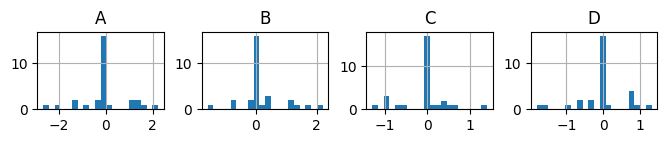

In [13]:
## demo data with many zeros
data2=data.copy()
for c in data2:
    data2.loc[data2.sample(frac=0.5).index,c] = 0
_=data2.hist(bins=20,figsize=[8,1],layout=[1,4])
data2.head(1)

In [14]:
out=get_corrs(
    data=data2,
    method='spearman',
    resample=True,
    preprocess_kws=dict(drop_same_value=0),
)
out

,variable1,variable2,rr,ci,ci_type,n,method,r,P,Q
0,A,C,0.398835,0.140041,max,21,spearman,0.404651,0.068831,0.412985
1,A,D,-0.182668,0.051965,max,22,spearman,-0.172012,0.444007,0.666011
4,C,B,0.247783,0.110254,max,22,spearman,0.259475,0.243569,0.666011
5,D,B,-0.204630,0.205910,max,22,spearman,-0.201166,0.369344,0.666011
3,C,D,-0.085967,0.176876,max,20,spearman,-0.103817,0.663150,0.795780
2,A,B,-0.003221,0.166711,max,22,spearman,-0.002915,0.989726,0.989726


## Documentation
[`roux.stat.corr`](https://github.com/rraadd88/roux#module-rouxstatcorr)